# Popular Data Science Questions
---
## Introduction
### What is this project about

In this scenario, we're working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms like [Dataquest](https://www.dataquest.io/). And as enthusiastic employees we've desided to o scour the internet in search for the answer to the question:
* **What is it that people want to learn about in data science?**

Thinking back to our experience when we first started learning programming, it occurs to us that if we wanted to figure out what programming content to write, we could consult [Stack Overflow](https://stackoverflow.com/) and see what kind of content is more popular. We've decided to investigate Stack Overflow a little more and found out that it is part of a question and answer website network called [Stack Exchange](https://stackexchange.com/).
![Image](https://dq-content.s3.amazonaws.com/469/se_sites.png)

---

Stack Exchange hosts a huge amount of sitess on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science. Just what we are looking for!
Also we can include data engineering as our point of interest. So there are some websites relevant to our goal:
* [Data Science](https://datascience.stackexchange.com/)
* [Cross Validated](https://stats.stackexchange.com/) (a statistics site)
* [Artificial Intelligence](https://ai.stackexchange.com/)
* [Mathematics](https://math.stackexchange.com/)
* [Stack Overflow](https://stackoverflow.com/) itself
* [Database Administrators](https://dba.stackexchange.com/)
* [Unix & Linux](https://unix.stackexchange.com/)
* [Software Engineering](https://softwareengineering.stackexchange.com/)

### A closer look to the Stack Exchange websites
Let's take for example **Stack Overflow** and walk through it a bit just to get you familiar with it. Another sites are similar to Stack Overflow

Basically **it is Q&A website** where everyone welcomes to ask about a wide range of topics in computer programming. If someone runs into a problem, doesn't know exactly how a particular function works, or is struggling to get their code to work they come here.

Due to issues can be related to different programming languages, there is a **tagging system** that helps filter and navigate content. Also there is a **voting system** that allows to rate best questions and answers so their authors can earn reputation points.

And finally there is a **job finding section** where you can try to get youself a new fancy job.

So the question here is the main unit followed with answer and comments. It has rating, views number and tags (usually)

![Image](https://upload.wikimedia.org/wikipedia/commons/d/dd/Stack_Overflow_Home.png)

---

### Stack Exchange Database

Stack Exchange provides a public data base for each of its websites. Here's a link to query and explore [Data Science Stack Exchange's database](https://data.stackexchange.com/datascience/query/new). It uses a Transact-SQL to write queries.

There are a lot of intresting tables like:
* Posts
* Tags
* TagSynonymous
* Comments

## First steps
### Stack Exchange Data Explorer
Stack Exchange Data Explorer or just SEDE is a great instrument so why wouldn't we use it. We can run a query right there and just download a CSV file that we'll be able to use further.

Let's start with the posts table. We'll be focusing our attention on those that seem relevant towards our goal:

* **Id**: An identification number for the post.
* **PostTypeId**: An identification number for the type of post.
* **CreationDate**: The date and time of creation of the post.
* **Score**: The post's score.
* **ViewCount**: How many times the post was viewed.
* **Tags**: What tags were used.
* **AnswerCount**: How many answers the question got.
* **FavoriteCount**: How many times the question was favored.

Also we will limit ourselves questions asked in 2019.

To get that info from the SEDE we'll run the folllowing query:
```
SELECT p.Id, pt.Name AS PostType, p.CreationDate, p.Score,
       p.ViewCount, p.Tags, p.AnswerCount, p.FavoriteCount
  FROM posts AS p
       LEFT JOIN PostTypes AS pt
       ON p.PostTypeId = pt.Id
 WHERE YEAR(CreationDate) = 2019;
```
Then we'll just download related CSV and read it to the dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

stack_2019_df = pd.read_csv("QueryResults.csv")
stack_2019_df.head()

,Id,PostType,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,49302,Question,2019-04-15 04:00:33,0,1818.0,<python><statistics>,1.0,NaN
1,49303,Answer,2019-04-15 04:34:33,4,NaN,NaN,NaN,NaN
2,49304,Question,2019-04-15 05:35:40,0,123.0,<logistic-regression>,1.0,NaN
3,49305,Answer,2019-04-15 05:43:03,0,NaN,NaN,NaN,NaN
4,49306,Question,2019-04-15 06:02:12,0,172.0,<nlp><chatbot>,1.0,1.0


### Exploring and cleansing

Nowe we have familiar that we can explore. So let's see what we're dealing with!

Start with overall info.

In [2]:
stack_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14676 entries, 0 to 14675
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             14676 non-null  int64  
 1   PostType       14676 non-null  object 
 2   CreationDate   14676 non-null  object 
 3   Score          14676 non-null  int64  
 4   ViewCount      6773 non-null   float64
 5   Tags           6773 non-null   object 
 6   AnswerCount    6773 non-null   float64
 7   FavoriteCount  1656 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 917.4+ KB


Thera are a few issues as we can see:
* `CreationDate` column isn't `datetime` type. We should fix it.
* `ViewCount`, `AnswerCount` and `FavoriteCount` columns should be `int64`.
* `ViewCount`, `AnswerCount` and `FavoriteCount` columns have a lot of missing values. We may find a way to fix it aswell.
* `Tags` column aslo has missing values but due to it's not a counting column it will not be easy to fix.

First goes first - let's deal with the `CreationDate` column.

In [3]:
stack_2019_df['CreationDate'] = pd.to_datetime(stack_2019_df['CreationDate'])
stack_2019_df['CreationDate'].head()

0   2019-04-15 04:00:33
1   2019-04-15 04:34:33
2   2019-04-15 05:35:40
3   2019-04-15 05:43:03
4   2019-04-15 06:02:12
Name: CreationDate, dtype: datetime64[ns]

It's done!

Now proceed to the next step - missing values with the counting columns.

`AnswerCount` column is appliable for questions only. It's obvious actually. Why would you answer to the another answer! There are comments for it.

And making favorite answer or comment also isn't convenient because the question is the boss here as we already know. So `FavoriteCount` column used to only question itself.

In this way all `NaN` values should be in these columns only. Let's check these columns for all non-question post types.

In [4]:
stack_2019_df.loc[stack_2019_df['PostType'] != 'Question', ['PostType', 'AnswerCount', 'FavoriteCount']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7903 entries, 1 to 14673
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PostType       7903 non-null   object 
 1   AnswerCount    0 non-null      float64
 2   FavoriteCount  0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 247.0+ KB


Yep, all values are `NaN` in our columns like we've assumed. So it is reasonable to replace them to `0`.

Probably `ViewCount` column uses `NaN` values instead of `0`. We'll check it aswell.

In [5]:
stack_2019_df['ViewCount'].value_counts(dropna=False).sort_index()

8.0            2
9.0            5
10.0           5
11.0           9
12.0           8
            ... 
92580.0        1
106605.0       1
111240.0       1
152559.0       1
NaN         7903
Name: ViewCount, Length: 1899, dtype: int64

There is no `0` values at all so as we assumed `NaN` stands for it.

Now we can easily replace all `NaN`s with `0` and change type to the `int64` at the same time.

In [6]:
stack_2019_df[['ViewCount','AnswerCount', 'FavoriteCount']] = stack_2019_df[
    ['ViewCount', 'AnswerCount', 'FavoriteCount']].fillna(0).astype('int64')

stack_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14676 entries, 0 to 14675
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             14676 non-null  int64         
 1   PostType       14676 non-null  object        
 2   CreationDate   14676 non-null  datetime64[ns]
 3   Score          14676 non-null  int64         
 4   ViewCount      14676 non-null  int64         
 5   Tags           6773 non-null   object        
 6   AnswerCount    14676 non-null  int64         
 7   FavoriteCount  14676 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 917.4+ KB


### Tags

Now we can start cleansing probably the most important column - `Tags`. At first look there are two problems:
* Missing values
* Quite inconvinient way of storing more than two tags - `<python><statistics>`

Let's solve the second problem first. String `<python><statistics>` actually means two different tags: `python` and `stasistics`. So it seems logical to separate two tags with `,` and not with `><`. Also we don't need any extra symbols at the begining and at the end of the strings.

So let's replace all `><` with `,` and remove any single angle brackets.

In [7]:
stack_2019_df['Tags'] = stack_2019_df['Tags'].str.replace('><', ',')\
                                             .str.replace('<', '')\
                                             .str.replace('>', '')
stack_2019_df['Tags']

0                                        python,statistics
1                                                      NaN
2                                      logistic-regression
3                                                      NaN
4                                              nlp,chatbot
                               ...                        
14671    python,scikit-learn,anomaly-detection,outlier,...
14672        python,scikit-learn,anomaly-detection,outlier
14673                                                  NaN
14674                           python,logistic-regression
14675               dataset,nlp,machine-translation,google
Name: Tags, Length: 14676, dtype: object

Now we can go back to the missing values.

I think missing values here stand for `0` so these posts just do not have any tags. We can easily replace `NaN` with `0` like we did before.

In [8]:
stack_2019_df['Tags'].fillna("No tags", inplace=True)
stack_2019_df['Tags']

0                                        python,statistics
1                                                  No tags
2                                      logistic-regression
3                                                  No tags
4                                              nlp,chatbot
                               ...                        
14671    python,scikit-learn,anomaly-detection,outlier,...
14672        python,scikit-learn,anomaly-detection,outlier
14673                                              No tags
14674                           python,logistic-regression
14675               dataset,nlp,machine-translation,google
Name: Tags, Length: 14676, dtype: object

## Time for analysys

### Tags count

So far we have clean and preaty dataframe which means we are free to start some analysys. But first let me remind our main question:
* **What is it that people want to learn about in data science?**

The best way to answer to this question is using tags because each tag is like a short questions topic. But these is still one problem - we have strings with multiply tags. Fortunately we can split them using `,` as delimiter.

In [9]:
tags_df = stack_2019_df['Tags'].str.split(',', expand=True)
tags_df

,0,1,2,3,4
0,python,statistics,None,None,None
1,No tags,None,None,None,None
2,logistic-regression,None,None,None,None
3,No tags,None,None,None,None
4,nlp,chatbot,None,None,None
...,...,...,...,...,...
14671,python,scikit-learn,anomaly-detection,outlier,data-imputation
14672,python,scikit-learn,anomaly-detection,outlier,None
14673,No tags,None,None,None,None
14674,python,logistic-regression,None,None,None


Now we only have to combine all columns and drop `NaN` values.

In [10]:
tags = tags_df[0]

for i in range(1,5):
    tags = pd.concat([tags, tags_df[i]])

tags.dropna(inplace=True)
tags.reset_index(drop=True, inplace=True)

tags

0                       python
1                      No tags
2          logistic-regression
3                      No tags
4                          nlp
                 ...          
28431          word-embeddings
28432      predictive-modeling
28433                  smotenc
28434    unsupervised-learning
28435          data-imputation
Length: 28436, dtype: object

In [11]:
tags[tags.str.contains('machine-learning')].value_counts()

machine-learning          2134
machine-learning-model     172
dtype: int64

We've got series that contains separated tags. With that we can find how many times each tag was used. Let's check **top 7** for example.

Text(0.5, 1.0, 'Top 7 used tags')

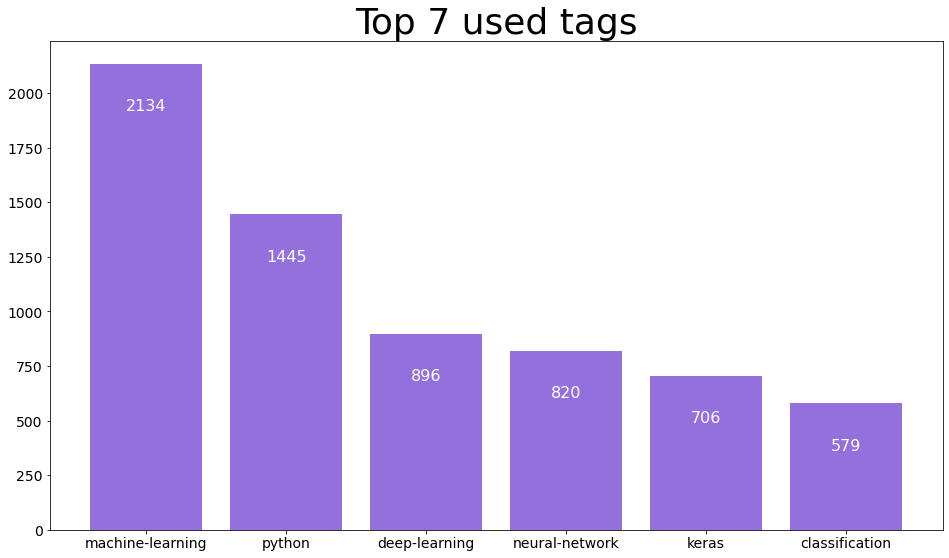

In [12]:
%matplotlib inline

#Create df for seven most used tags exlude "No tags"
top_7_tags = tags.value_counts().head(7).to_frame()
top_7_tags.drop('No tags', inplace=True)
top_7_tags.columns = ['Uses']

#Simple bar plot for uses
fig, ax = plt.subplots(figsize=(16,9))
ax.bar(top_7_tags.index, top_7_tags['Uses'], color="mediumpurple")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

def set_annotations(ax, df_column):
    #Make annotation for bar plot
    for i, uses in enumerate(df_column):
        ax.text(i, uses - 0.1 * df_column.iloc[0], uses,
                horizontalalignment='center', fontsize=16, color="white")
        
set_annotations(ax, top_7_tags.Uses)

plt.title("Top 7 used tags", fontsize=36)

Okay, we have the most used tags top. Our current leader is **machine-learning** tag with **2134** uses. But there can be one tricky problem. 
>What if posts with these tags have never been seen and answered? 

So it would be unwise not to check how many views or answers do these posts have. Let's add these metrics to `top_7_tags` dataframe.

In [13]:
# Iterate for each tag from top 7
for tag in top_7_tags.index:
        
    mask = stack_2019_df['Tags'].str.contains(tag, regex=False)
    
    tag_views = stack_2019_df.loc[mask, 'ViewCount'].sum()#Views for current tag
    tag_answers = stack_2019_df.loc[mask, 'AnswerCount'].sum()#Answers for current tag
    
    top_7_tags.loc[tag, 'Views'] = tag_views
    top_7_tags.loc[tag, 'Answers'] = tag_answers

top_7_tags[['Views', 'Answers']] = top_7_tags[
                                 ['Views','Answers']].astype('int64')
    
top_7_tags

,Uses,Views,Answers
machine-learning,2134,1621199,2624
python,1445,2453840,1669
deep-learning,896,907840,1003
neural-network,820,836628,988
keras,706,1026508,736
classification,579,683915,1024


Now we can build plot for views and answers aswell.

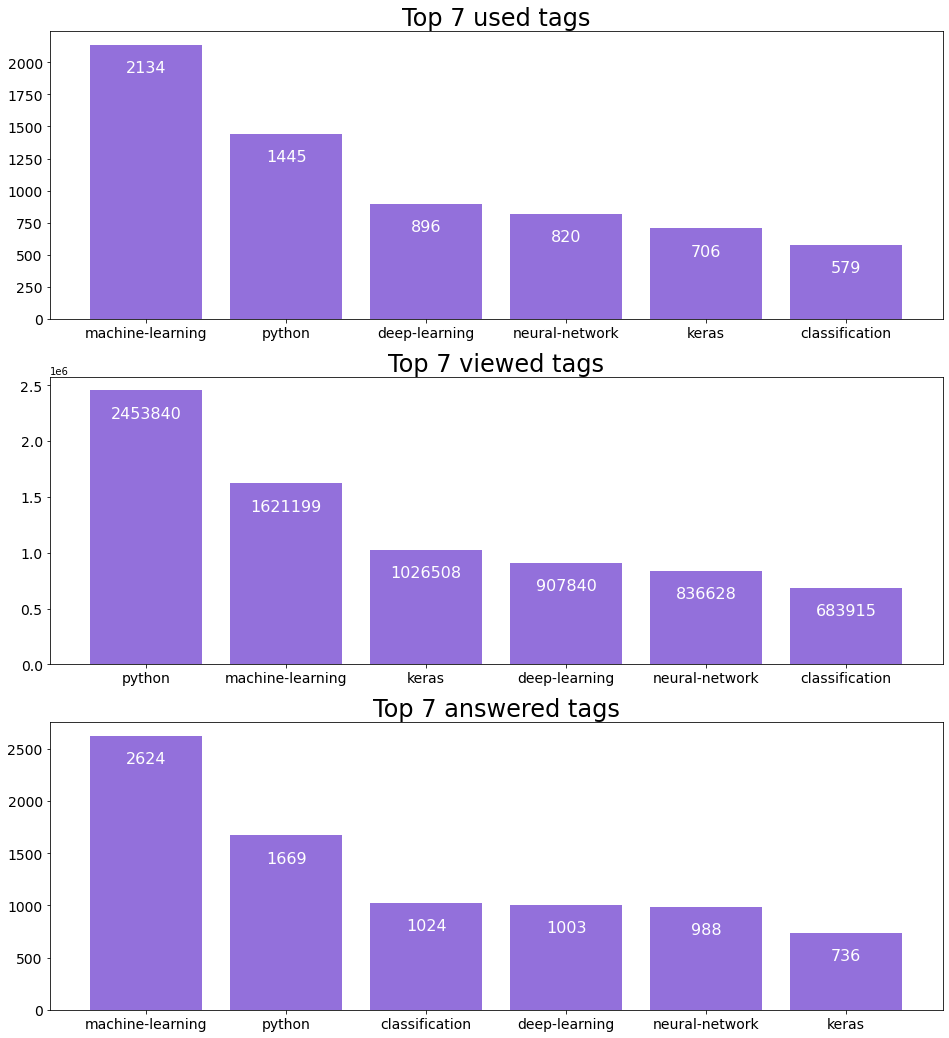

In [14]:
fig, axs = plt.subplots(3, figsize=(16,18))

#Plot for uses
axs[0].bar(top_7_tags.index, top_7_tags['Uses'],
           color="mediumpurple")

axs[0].set_title("Top 7 used tags", fontsize=24)
set_annotations(axs[0], top_7_tags.Uses)

#Plot for views
top_7_tags.sort_values(by='Views', ascending=False, inplace=True)

axs[1].bar(top_7_tags.index, top_7_tags['Views'],
           color="mediumpurple")

axs[1].set_title("Top 7 viewed tags", fontsize=24)
set_annotations(axs[1], top_7_tags.Views)

#Plot for answers
top_7_tags.sort_values(by='Answers', ascending=False, inplace=True)

axs[2].bar(top_7_tags.index, top_7_tags['Answers'].sort_values(ascending=False),
           color="mediumpurple")

axs[2].set_title("Top 7 answered tags", fontsize=24)
set_annotations(axs[2], top_7_tags.Answers)

for i in range(0,3):
    axs[i].tick_params(labelsize=14)

Let's work with views because there a lot of read only I assume they generates views only.